In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.svm import SVC # for Support Vector Classification model

In [2]:
df1 = pd.read_csv('/Users/amalalmansour/Downloads/MaxSlice_LIDC.csv')
df2 = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Spiculation/Agreement_Binary_Rating.csv')

In [3]:
ID_agree = df2[['InstanceID','Agreement']]
ID_agree

,InstanceID,Agreement
0,4,1
1,118,3
2,134,1
3,143,1
4,175,3
...,...,...
1327,40771,2
1328,40780,1
1329,40794,0
1330,40801,0


In [4]:
train_slices = pd.merge(ID_agree, df1)
display(train_slices)

,InstanceID,Agreement,noduleID,DicomImage,FilePath,subtlety,internalStructure,calcification,sphericity,margin,...,Correlation,Energy,Homogeneity,Entropy,x_3rdordermoment,Inversevariance,Sumaverage,Variance,Clustertendency,MaxProbability
0,4,1,1,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0001\1.3.6.1....,5,1,6,3,3,...,0.894,0.0003,0.0532,8.15,1290000,0.0223,661.0,143000,541000,0.0009
1,118,3,5,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0003\1.3.6.1....,4,1,6,4,5,...,0.793,0.0018,0.0764,6.43,8600000,0.0392,565.0,137000,492000,0.0052
2,134,1,3,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0003\1.3.6.1....,5,1,6,5,4,...,0.899,0.0004,0.0572,8.03,735000,0.0247,416.0,111000,420000,0.0010
3,143,1,4,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0003\1.3.6.1....,3,1,6,5,5,...,0.692,0.0027,0.0312,6.03,-469000,0.0107,420.0,98700,333000,0.0043
4,175,3,6,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0004\1.3.6.1....,5,1,3,5,5,...,0.634,0.0076,0.0296,4.98,15500000,0.0097,403.0,200000,650000,0.0105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,40771,2,2655,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-1010\1.3.6.1....,3,1,6,2,5,...,0.662,0.0071,0.0334,5.05,12500000,0.0130,446.0,101000,334000,0.0090
1328,40780,1,2657,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-1011\1.3.6.1....,5,1,6,5,5,...,0.877,0.0005,0.0527,7.81,2250000,0.0229,496.0,130000,488000,0.0013
1329,40794,0,2656,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-1011\1.3.6.1....,5,1,6,3,2,...,0.799,0.0009,0.0405,7.15,-3460000,0.0130,530.0,75600,272000,0.0020
1330,40801,0,2658,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-1011\1.3.6.1....,5,4,6,3,3,...,0.622,0.0007,0.0403,7.44,208000,0.0176,386.0,91200,296000,0.0018


In [5]:
numeric_feature_names = ['Area', 'ConvexArea', 'Perimeter', 'ConvexPerimeter', 'EquivDiameter',
                         'MajorAxisLength', 'MinorAxisLength',
                         'Elongation', 'Compactness', 'Eccentricity', 'Solidity', 'Extent',
                         'Circularity', 'RadialDistanceSD', 'SecondMoment', 'Roughness', 'MinIntensity',
                         'MaxIntensity', 'MeanIntensity', 'SDIntensity', 'MinIntensityBG',
                         'MaxIntensityBG', 'MeanIntensityBG', 'SDIntensityBG',
                         'IntensityDifference', 'markov1', 'markov2', 'markov3', 'markov4',
                         'markov5', 'gabormean_0_0', 'gaborSD_0_0', 'gabormean_0_1',
                         'gaborSD_0_1', 'gabormean_0_2', 'gaborSD_0_2', 'gabormean_1_0',
                         'gaborSD_1_0', 'gabormean_1_1', 'gaborSD_1_1', 'gabormean_1_2',
                         'gaborSD_1_2', 'gabormean_2_0', 'gaborSD_2_0', 'gabormean_2_1',
                         'gaborSD_2_1', 'gabormean_2_2', 'gaborSD_2_2', 'gabormean_3_0',
                         'gaborSD_3_0', 'gabormean_3_1', 'gaborSD_3_1', 'gabormean_3_2',
                         'gaborSD_3_2', 'Contrast', 'Correlation', 'Energy', 'Homogeneity',
                         'Entropy', 'x_3rdordermoment', 'Inversevariance', 'Sumaverage',
                         'Variance', 'Clustertendency']

In [6]:
df_feature = train_slices[['Area', 'ConvexArea', 'Perimeter', 'ConvexPerimeter', 'EquivDiameter',
                         'MajorAxisLength', 'MinorAxisLength',
                         'Elongation', 'Compactness', 'Eccentricity', 'Solidity', 'Extent',
                         'Circularity', 'RadialDistanceSD', 'SecondMoment', 'Roughness', 'MinIntensity',
                         'MaxIntensity', 'MeanIntensity', 'SDIntensity', 'MinIntensityBG',
                         'MaxIntensityBG', 'MeanIntensityBG', 'SDIntensityBG',
                         'IntensityDifference', 'markov1', 'markov2', 'markov3', 'markov4',
                         'markov5', 'gabormean_0_0', 'gaborSD_0_0', 'gabormean_0_1',
                         'gaborSD_0_1', 'gabormean_0_2', 'gaborSD_0_2', 'gabormean_1_0',
                         'gaborSD_1_0', 'gabormean_1_1', 'gaborSD_1_1', 'gabormean_1_2',
                         'gaborSD_1_2', 'gabormean_2_0', 'gaborSD_2_0', 'gabormean_2_1',
                         'gaborSD_2_1', 'gabormean_2_2', 'gaborSD_2_2', 'gabormean_3_0',
                         'gaborSD_3_0', 'gabormean_3_1', 'gaborSD_3_1', 'gabormean_3_2',
                         'gaborSD_3_2', 'Contrast', 'Correlation', 'Energy', 'Homogeneity',
                         'Entropy', 'x_3rdordermoment', 'Inversevariance', 'Sumaverage',
                         'Variance', 'Clustertendency']]

In [7]:
df_feature

,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,Eccentricity,...,Contrast,Correlation,Energy,Homogeneity,Entropy,x_3rdordermoment,Inversevariance,Sumaverage,Variance,Clustertendency
0,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,2.073908,0.546909,...,30300,0.894,0.0003,0.0532,8.15,1290000,0.0223,661.0,143000,541000
1,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,1.117274,0.326408,...,58900,0.793,0.0018,0.0764,6.43,8600000,0.0392,565.0,137000,492000
2,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,1.879012,0.628016,...,22400,0.899,0.0004,0.0572,8.03,735000,0.0247,416.0,111000,420000
3,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,1.308681,0.769539,...,61400,0.692,0.0027,0.0312,6.03,-469000,0.0107,420.0,98700,333000
4,71,73,32.142136,31.494737,9.507892,10.528352,8.908660,1.181811,1.157927,0.532931,...,172000,0.634,0.0076,0.0296,4.98,15500000,0.0097,403.0,200000,650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,73,75,32.384776,32.028485,9.640876,11.517956,8.186050,1.407022,1.143271,0.703474,...,79100,0.662,0.0071,0.0334,5.05,12500000,0.0130,446.0,101000,334000
1328,638,759,122.811183,111.554028,28.501348,40.463803,22.859777,1.770087,1.881245,0.825129,...,32400,0.877,0.0005,0.0527,7.81,2250000,0.0229,496.0,130000,488000
1329,437,464,84.669048,79.410448,23.588253,27.044347,21.611186,1.251405,1.305443,0.601196,...,30500,0.799,0.0009,0.0405,7.15,-3460000,0.0130,530.0,75600,272000
1330,657,674,98.083261,94.830869,28.922627,33.204797,25.377464,1.308436,1.165238,0.644895,...,69700,0.622,0.0007,0.0403,7.44,208000,0.0176,386.0,91200,296000


In [8]:
agreements = train_slices['Agreement']

In [14]:
'''df_feature = pd.DataFrame(scale.fit_transform(df_feature.values), columns= numeric_feature_names)
df_feature = np.array(df_feature)'''

In [9]:
import itertools
#creating cunfusion matrix

def custom_confusion_matrix(y_true, y_pred, classes=None,figsize=(15,15), text_size=15):
    #figsize = (10,10)
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]#normalize the confusion matrix
    n_classes = cm.shape[0]
    
    #adjusting the cunfusion matrix
    fig, ax = plt.subplots(figsize=figsize)
    #Creating a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    #create classes
    #classes = False
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    #Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    #Set axis label to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    #Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    #Set threshold for diffferent colors
    threshold = (cm.max() + cm.min())/2.
    
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100: .1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j]>threshold else "black",
                size = text_size)

In [10]:
def fitting(X, y, C, gamma):
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    # Note, available kernels: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
    model = SVC(kernel='rbf', probability=True, C=C, gamma=gamma)
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Use score method to get accuracy of the model
    print('----- Evaluation on Test Data -----')
    classes_name = ["No","Low", "High", "Full"]
    custom_confusion_matrix(y_test,
                       pred_labels_te,
                       classes_name,
                       (15,15),
                       10)
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    
    print('----- Evaluation on Training Data -----')
    custom_confusion_matrix(y_train,
                       pred_labels_tr,
                       classes_name,
                       (15,15),
                       10)
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf

----- Evaluation on Test Data -----
Accuracy Score:  0.4794007490636704
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.47      0.97      0.64       116
           2       0.50      0.14      0.22        84
           3       0.57      0.09      0.15        46

    accuracy                           0.48       267
   macro avg       0.39      0.30      0.25       267
weighted avg       0.46      0.48      0.37       267

--------------------------------------------------------
----- Evaluation on Training Data -----


/Users/amalalmansour/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amalalmansour/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amalalmansour/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Accuracy Score:  0.42347417840375584
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.41      0.93      0.57       406
           2       0.48      0.14      0.22       373
           3       0.62      0.10      0.18       224

    accuracy                           0.42      1065
   macro avg       0.38      0.29      0.24      1065
weighted avg       0.46      0.42      0.33      1065

--------------------------------------------------------


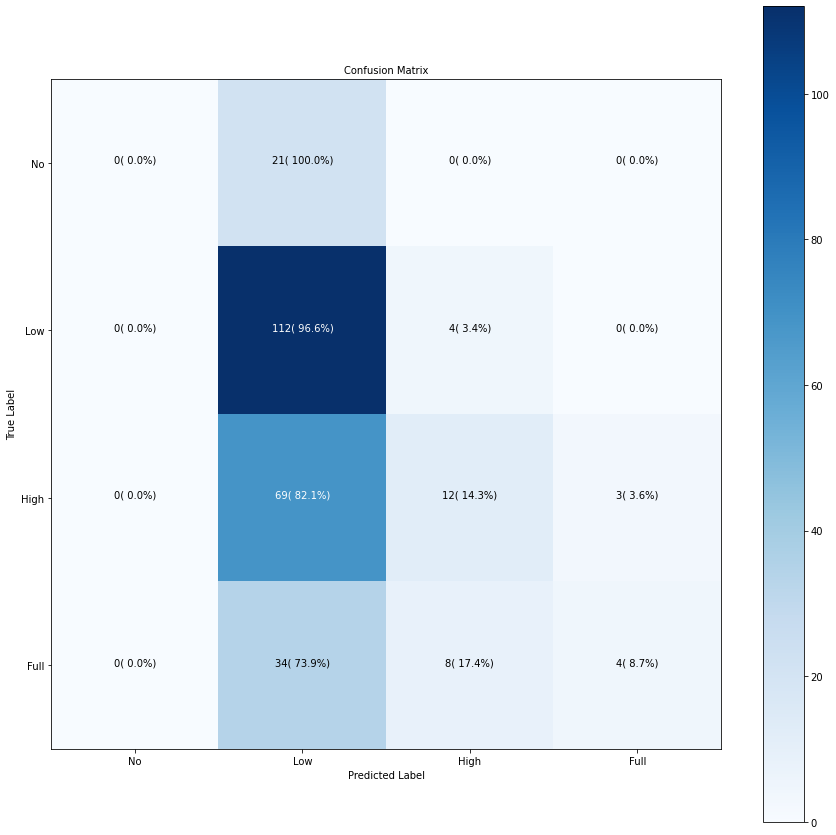

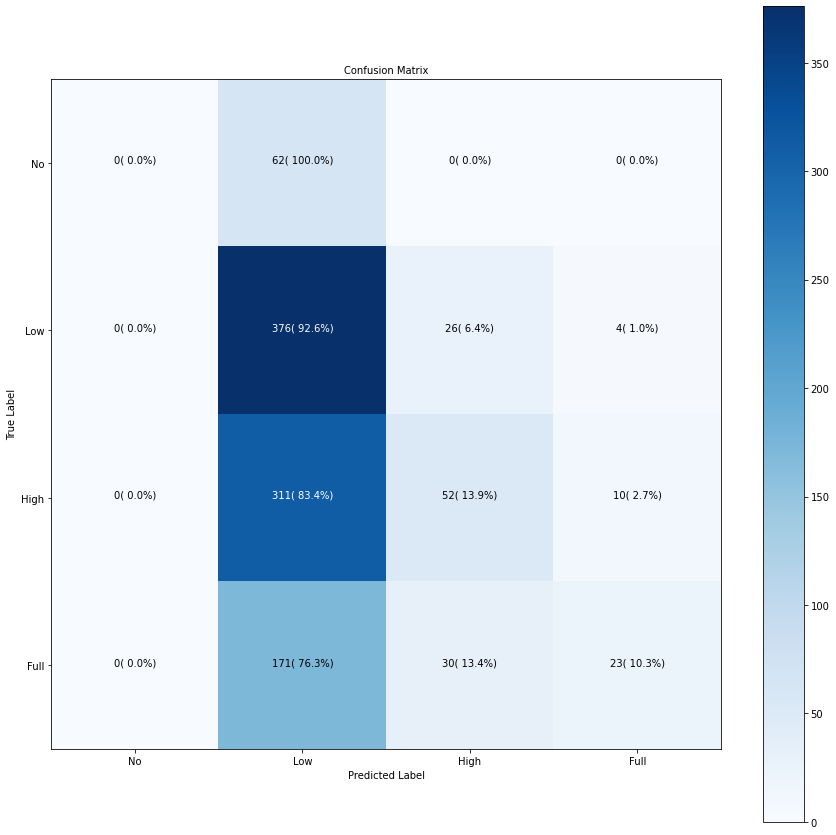

In [11]:
# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(df_feature, agreements, 1, 'scale')

----- Evaluation on Test Data -----
Accuracy Score:  0.4344569288389513
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.43      1.00      0.61       116
           2       0.00      0.00      0.00        84
           3       0.00      0.00      0.00        46

    accuracy                           0.43       267
   macro avg       0.11      0.25      0.15       267
weighted avg       0.19      0.43      0.26       267

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       406
           2       1.00      1.00      1.00       373
           3       1.00      1.00      1.00       224

    accuracy                           1.00      1065
   macro avg       1.00      1.00      1.00      

/Users/amalalmansour/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amalalmansour/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amalalmansour/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

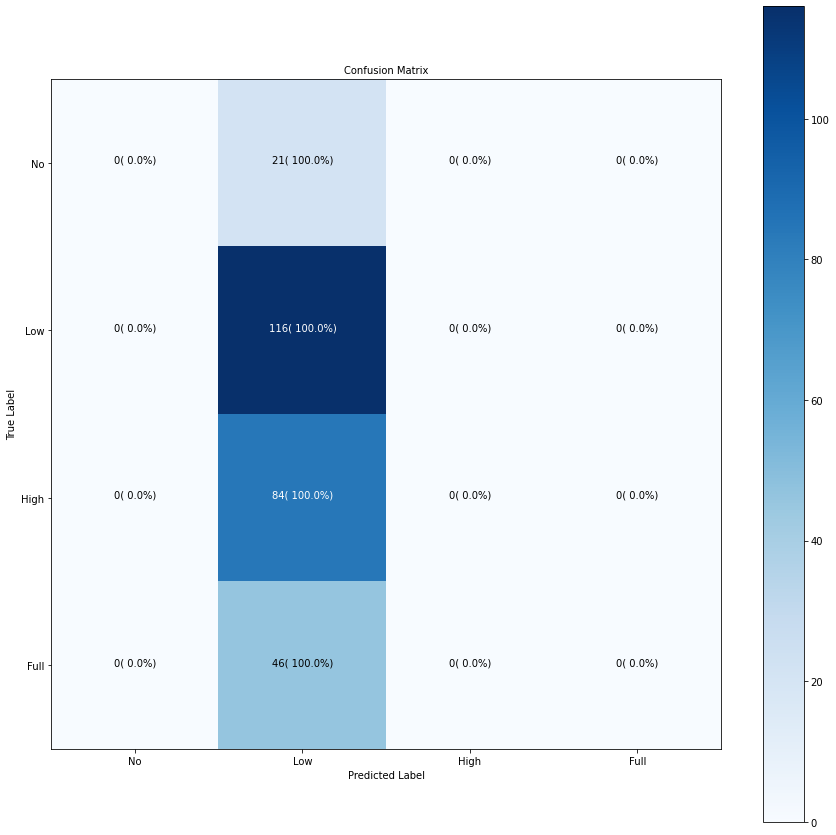

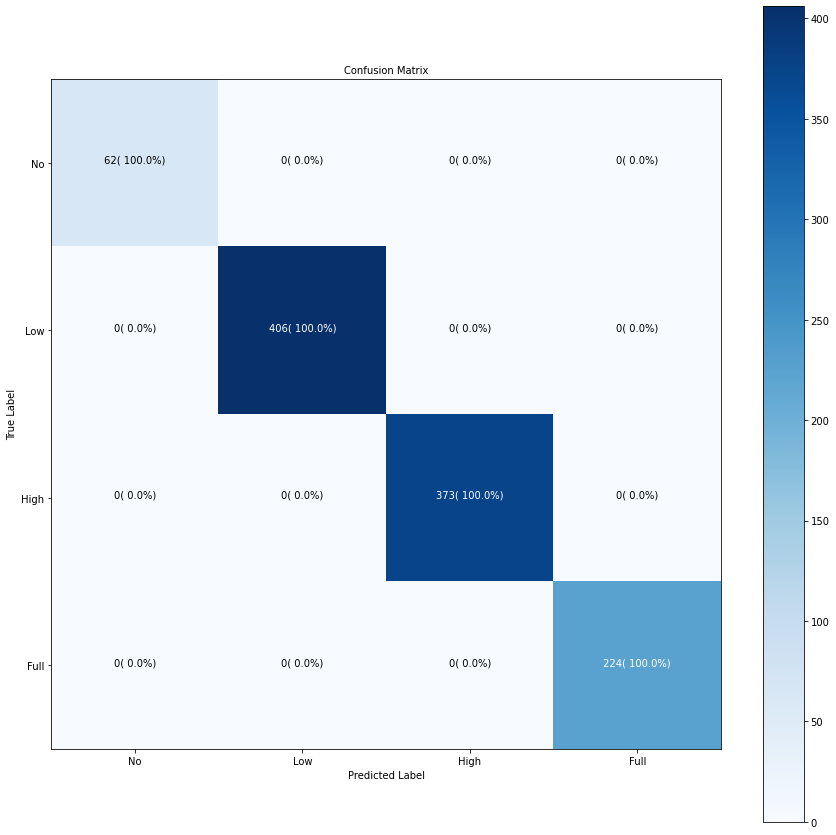

In [12]:
# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(df_feature, agreements, 1,  0.1)

----- Evaluation on Test Data -----
Accuracy Score:  0.4344569288389513
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.43      1.00      0.61       116
           2       0.00      0.00      0.00        84
           3       0.00      0.00      0.00        46

    accuracy                           0.43       267
   macro avg       0.11      0.25      0.15       267
weighted avg       0.19      0.43      0.26       267

--------------------------------------------------------
----- Evaluation on Training Data -----
Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       406
           2       1.00      1.00      1.00       373
           3       1.00      1.00      1.00       224

    accuracy                           1.00      1065
   macro avg       1.00      1.00      1.00      

/Users/amalalmansour/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amalalmansour/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amalalmansour/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

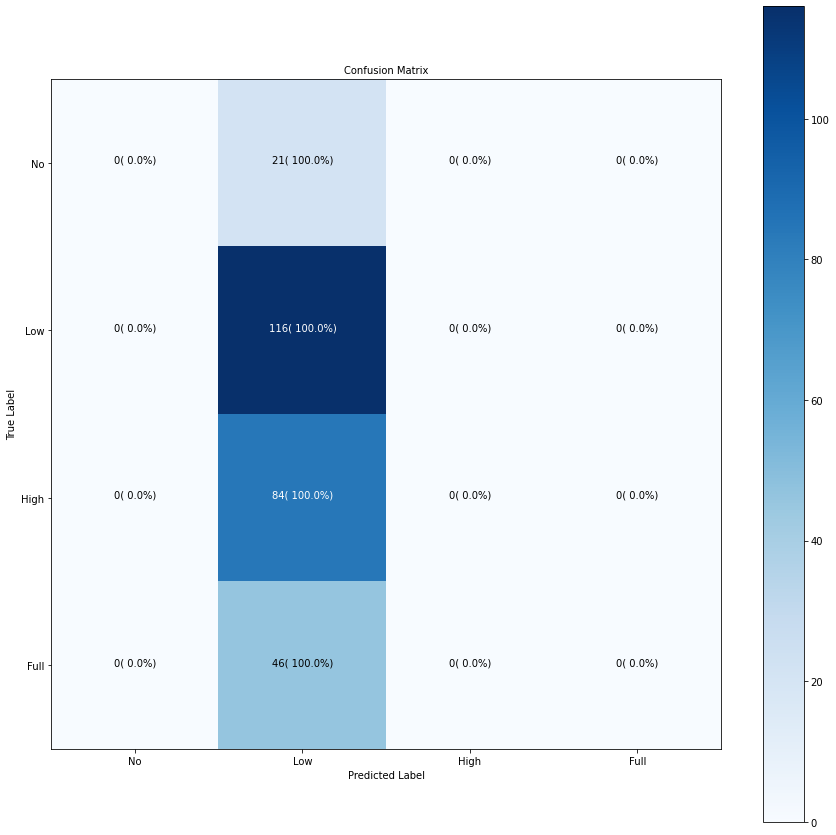

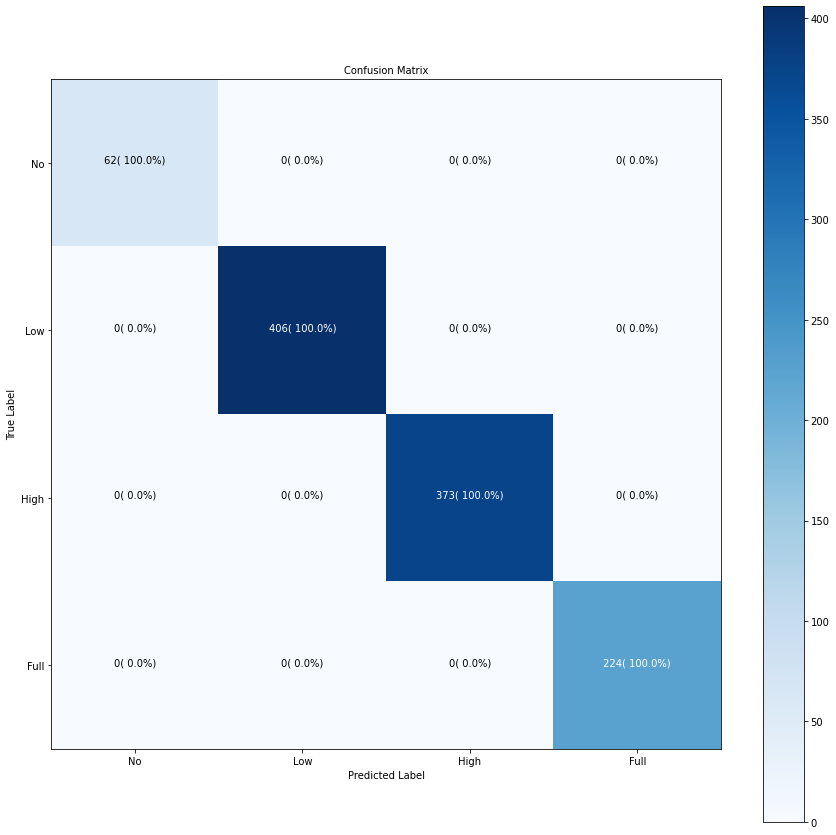

In [13]:
# Fit the model and display results
X_train, X_test, y_train, y_test, clf = fitting(df_feature, agreements, 1, 0.000001)